# Libraries

! pip install numpy pandas sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

# Import data

## X

In [ ]:
# For training the model
X_train = pd.read_csv("../X/X_train.csv" , index_col=[0], header=[0,1, 2])

# For cross validation
X_valid = pd.read_csv("../X/X_valid.csv", index_col=[0], header=[0, 1, 2])

# For prediction
X_test = pd.read_csv("../X/X_test.csv", index_col=[0], header=[0, 1, 2])

## Task 1

In [4]:
y_train_t1 = pd.read_csv("../Task1/Y_train.csv")
y_valid_t1 = pd.read_csv("../Task1/Y_valid.csv")

In [5]:
y_train_t1_value=y_train_t1["mort_icu"]
y_valid_t1_value=y_valid_t1["mort_icu"]

## Task 2

In [6]:
y_train_t2 = pd.read_csv("../Task2/Y_train.csv")
y_valid_t2 = pd.read_csv("../Task2/Y_valid.csv")

In [7]:
y_train_t2_value=y_train_t2["los_icu"]
y_valid_t2_value=y_valid_t2["los_icu"]

# Data Pre-processing

## Process 1: Mean


In [8]:
li=[] # Find the positions of the columns with means of the particular feature after 24 hours
for i in range(47, 7488, 72):
    li.append(i)
#print(li)

headlist=list(X_train.columns.values)[1:]
head=[]
for i in li:
    head.append(headlist[i][0])

dx_train = pd. DataFrame(X_train)
X_train_mean= dx_train.iloc[:,li]
X_train_mean.columns=head

dx_valid = pd. DataFrame(X_valid)
X_valid_mean= dx_valid.iloc[:,li]
X_valid_mean.columns=head

dx_test = pd. DataFrame(X_test)
X_test_mean= dx_test.iloc[:,li]
X_test_mean.columns=head

In [9]:
X_valid_mean

,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,tidal volume set,tidal volume spontaneous,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine
4_185777_294638,-0.255529,-0.539814,0.0,0.0,0.0,4.967764,0.152716,-0.230571,-0.742403,-0.480340,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1.220127,-0.265520,0.000000
21_109451_217847,-0.149653,0.000000,0.0,0.0,0.0,-0.325534,3.052859,-0.064531,0.000000,-1.766315,...,0.000000,0.000000,0.0,0.0,0.0,0.973905,-0.794602,-0.705746,0.797607,0.000000
25_129635_203487,-0.256599,0.036202,0.0,0.0,0.0,-0.678421,-1.780713,-0.225827,-0.484272,0.162647,...,0.000000,0.000000,0.0,0.0,0.0,0.114525,-0.854332,0.785960,-0.088332,0.000000
114_178393_258626,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.591306,...,2.117668,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.854544,0.499185,-0.249199
129_164174_238431,-0.253390,-0.107802,0.0,0.0,0.0,-0.380889,-0.572320,-0.264570,-0.226141,0.162647,...,0.440628,0.457595,0.0,0.0,0.0,0.000000,0.000000,-0.431409,-0.274846,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99823_179720_296047,-0.229862,0.000000,0.0,0.0,0.0,-0.512357,-1.297356,-0.219502,0.000000,1.662951,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.822857,0.862887,0.000000
99868_177777_231346,-0.269432,2.628276,0.0,0.0,0.0,-0.588469,-1.539034,-0.270104,0.031990,-1.123327,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1.304283,-0.023052,0.000000
99899_188409_245756,-0.268363,-0.395810,0.0,0.0,0.0,0.657012,0.636073,-0.259035,0.000000,0.162647,...,-1.236412,-1.235133,0.0,0.0,0.0,-0.335202,0.000000,-0.908408,0.070204,0.501123
99901_131711_226541,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.572320,0.000000,0.000000,2.734597,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.293011,-0.302823,0.000000


In [111]:
scaler = StandardScaler()
scaler.fit(X_train_nozero)
log_=LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=3612)
sel_ = SelectFromModel(log_)
sel_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
X_train_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_train_nozero)))
X_valid_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_valid_nozero)))
X_test_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_test_nozero)))
cols=sel_.get_support(indices=True)
headnozero_new=[]
for i in cols:
    headnozero_new.append(headnozero[i])
X_train_selected_t1.columns=headnozero_new
X_valid_selected_t1.columns=headnozero_new
X_test_selected_t1.columns=headnozero_new
X_train_selected_t1

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bilirubin,blood urea nitrogen,calcium ionized,central venous pressure,...,respiratory rate,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,troponin-t,weight,white blood cell count
0,-0.288458,-3.306524e+00,-0.448675,0.480040,-0.220009,0.000000,-3.233569e-01,0.936056,-5.598335e-02,-2.578786e-01,...,-0.192388,4.819271e-01,0.064360,-0.867032,0.884117,5.371056e-01,6.239997e-01,4.104534e-17,1.244821,0.790869
1,-0.293777,-4.706776e-01,-0.635565,1.973117,-0.292865,-1.171347,-5.765104e-01,2.121048,-1.148847e-17,-3.528614e-01,...,-1.089607,-1.480117e-17,-1.068142,0.309697,-0.102469,3.751961e-17,-8.842220e-18,4.104534e-17,0.000000,-0.173856
2,-0.325687,1.138720e-17,-0.535891,-0.117191,-0.338660,3.287565,-4.921259e-01,-0.351978,-5.378030e-02,-4.857918e-18,...,-0.910163,-2.218059e-02,-0.615141,2.663156,0.822486,1.703934e+00,1.692524e+00,4.104534e-17,0.000000,0.190857
3,0.000000,1.138720e-17,0.000000,0.181425,0.000000,0.000000,2.398447e-17,-0.248935,-1.148847e-17,-4.857918e-18,...,-0.192388,-1.480117e-17,0.743862,-0.537548,-0.719132,3.751961e-17,-8.842220e-18,4.104534e-17,0.000000,0.084973
4,0.000000,1.138720e-17,0.000000,-0.714421,0.000000,0.000000,2.398447e-17,0.781492,-6.920168e-02,-2.578786e-01,...,-0.551276,2.298733e-01,1.423363,1.015735,0.514121,5.954471e-01,6.239997e-01,-5.419998e-01,0.000000,-0.503274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,0.000000,1.656207e+00,0.000000,-0.714421,0.000000,0.450076,2.398447e-17,-0.094371,-1.148847e-17,-4.857918e-18,...,-0.910163,-1.480117e-17,-0.162140,0.215559,-2.337736,3.751961e-17,-8.842220e-18,-6.385765e-01,0.705365,-0.150326
16756,0.000000,1.138720e-17,0.000000,0.181425,0.000000,-1.171347,2.398447e-17,-0.300456,-1.148847e-17,-4.857918e-18,...,0.345944,-1.480117e-17,0.290861,0.827458,0.051678,3.751961e-17,-8.842220e-18,-6.297968e-01,1.180862,0.567335
16757,-0.304413,1.656207e+00,-0.411297,-0.117191,-0.311599,0.000000,-7.020351e-02,0.214757,-3.174975e-02,1.071881e+00,...,-0.012944,-1.480117e-17,-0.841642,-0.914101,-0.950335,3.751961e-17,-8.842220e-18,4.104534e-17,-0.588114,-0.550334
16758,0.000000,1.138720e-17,0.000000,-1.013036,0.000000,0.000000,2.398447e-17,-0.300456,-1.148847e-17,-6.791287e-02,...,-0.012944,-1.480117e-17,1.649864,1.721773,0.437067,3.751961e-17,-8.842220e-18,4.104534e-17,0.945474,-0.562099


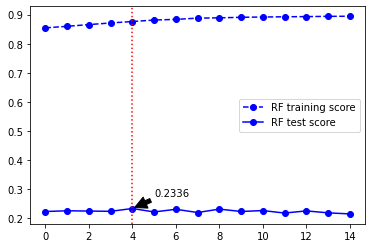

In [113]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text, plot_tree
from sklearn.ensemble import RandomForestRegressor
train_rf_scores = []
test_rf_scores = []

for depth in range(25, 40):
    rf_titanic = RandomForestRegressor(n_estimators=100, max_depth=depth, max_features=10
                                       , random_state=3612) # default is criterion="gini"
    rf_titanic.fit(X_train_nozero, y_train_t1_value.values.ravel())
    train_rf_scores.append(rf_titanic.score(X_train_nozero, y_train_t1_value))
    test_rf_scores.append(rf_titanic.score(X_valid_nozero, y_valid_t1_value))

plt.plot(train_rf_scores, 'bo--')
plt.plot(test_rf_scores, 'bo-')
plt.legend([ "RF training score", "RF test score"])
plt.axvline(np.argmax(test_rf_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_rf_scores).round(4), (np.argmax(test_rf_scores), np.max(test_rf_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()



In [115]:
scaler = preprocessing.StandardScaler()

X_train_selected_t1=X_train_selected_t1.values
X_train_selected_t1_scaled = scaler.fit_transform(X_train_selected_t1)
X_train_selected_t1_norm=pd.DataFrame(X_train_selected_t1_scaled)

X_train_selected_t2=X_train_selected_t2.values
X_train_selected_t2_scaled = scaler.fit_transform(X_train_selected_t2)
X_train_selected_t2_norm=pd.DataFrame(X_train_selected_t2_scaled)

X_valid_selected_t1=X_valid_selected_t1.values
X_valid_selected_t1_scaled = scaler.fit_transform(X_valid_selected_t1)
X_valid_selected_t1_norm=pd.DataFrame(X_valid_selected_t1_scaled)

X_valid_selected_t2=X_valid_selected_t2.values
X_valid_selected_t2_scaled = scaler.fit_transform(X_valid_selected_t2)
X_valid_selected_t2_norm=pd.DataFrame(X_valid_selected_t2_scaled)

X_test_selected_t1=X_test_selected_t1.values
X_test_selected_t1_scaled = scaler.fit_transform(X_test_selected_t1)
X_test_selected_t1_norm=pd.DataFrame(X_test_selected_t1_scaled)

X_test_selected_t2=X_test_selected_t2.values
X_test_selected_t2_scaled = scaler.fit_transform(X_test_selected_t2)
X_test_selected_t2_norm=pd.DataFrame(X_test_selected_t2_scaled)


# Data report

In [116]:
print("*"*60)
print("There are 6 set of X")
print("X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2")
print("-"*60)
print("Normalized version")
print("X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm")
print("-"*60)
print("There are 4 set of Y")
print("y_train_t1, y_train_t2, y_valid_t1, y_valid_t2")
print("when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'")
print("*"*60)

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************
